# Lab 2

by Alexander Chkodrov  
October 16th, 2019

## Problem 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

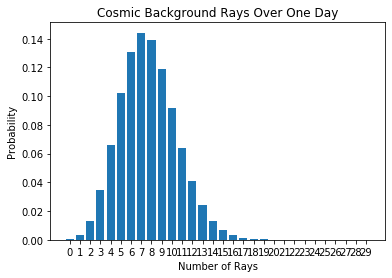

In [2]:
fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 10)

mu = 7.7 #Average of the Poisson Distribution
#x = np.arange(stats.poisson.ppf(0.00001, mu), 
#              stats.poisson.ppf(0.99999, mu))
xbase = np.arange(0, 30)
pmf = stats.poisson.pmf(xbase, mu)
fig = plt.bar(xbase, pmf, label='poisson pmf')
plt.title("Cosmic Background Rays Over One Day")
plt.xlabel("Number of Rays")
plt.ylabel("Probability")
plt.xticks(np.arange(min(xbase), max(xbase)+1, 1))
plt.show()

Suppose the above Poisson distribution (Average = 7.7) represents the noise created by background cosmic rays in one day while we search for a gamma-ray source.

What happens when we sum the number of rays over time?

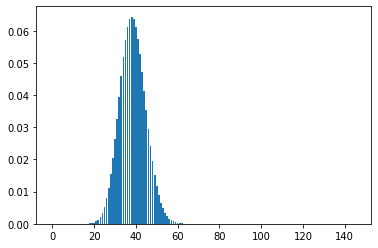

In [3]:
n = 5
sumpmf = pmf
for i in range(n-1):
    sumpmf = np.convolve(sumpmf, pmf)
    
x = np.arange(xbase[0]*n, xbase[-1]*n+1)
fig = plt.bar(x, sumpmf)

When we sum over 5 days, the resulting distribution appears similiar to a Gaussian distribution, however it is still discrete. Although there is a  drastic change from the original distribution, the new distribution is still a Poisson distribution by definition; it is discrete and still expresses the probability of a given number of events occuring within a fixed interval of time.

Now looking at the average over 5 days,

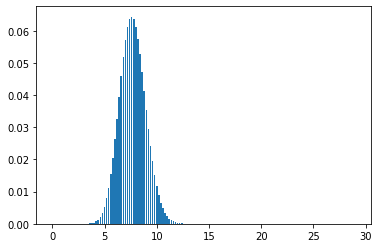

In [4]:
n = 5
sumpmf = pmf
for i in range(n-1):
    sumpmf = np.convolve(sumpmf, pmf)

x = np.arange(xbase[0]*n, xbase[-1]*n+1)
x = np.divide(x, n)
fig = plt.bar(x, sumpmf, width=0.15)
plt.show()

Averaging the number of cosmic rays over 5 days, the plot shows the distribution becoming less discrete, as the steps between each average value is not an integer. It also looks more Gaussian, like the above sum graph.

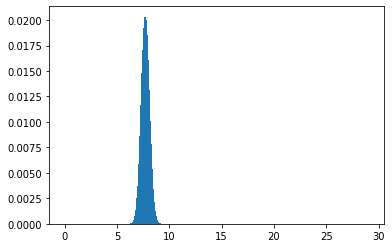

In [5]:
n = 50
sumpmf = pmf
for i in range(n-1):
    sumpmf = np.convolve(sumpmf, pmf)

x = np.arange(xbase[0]*n, xbase[-1]*n+1)
x = np.divide(x, n)
fig = plt.bar(x, sumpmf, width=0.1)
plt.show()

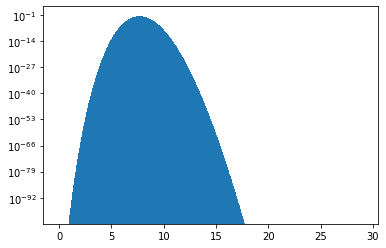

In [6]:
plt.yscale('log')
fig = plt.bar(x, sumpmf, width=0.1)
plt.show()

As the time period we average over becomes longer, the distance between steps becomes smaller since the averages of cosmic rays are not discrete integers like the total number of cosmic rays. The above graph of the average over 50 days looks like a gaussian with very small standard deviation. The log plot confirms this as it appears to follow a downward facing parabola. Our experiment is in agreement with the central limit theorem, as the more we sum/normalize the random variable that was originally a poisson distribution, the more it tends toward looking like a continuous Gaussian distribution.

Suppose we saw $Y\times N$ gamma rays from our source over $N$ days, where $Y = 16$ rays and $N = 10$ days. 

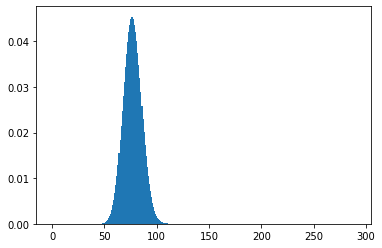

In [7]:
n = 10
sumpmf = pmf
for i in range(n-1):
    sumpmf = np.convolve(sumpmf, pmf)

x = np.arange(xbase[0]*n, xbase[-1]*n+1)
fig = plt.bar(x, sumpmf, width=1)

Then we would have seen $16 \times 10 = 160$ gamma rays. Find the index of x corresponding to 140 rays, and the same index in our probability mass function would correspond to the probability of seeing 160 rays over the time period. Summing the probabilities until that point gives us (1 - P) where P is the probability that the background could produce 160 or more cosmic rays.

In [8]:
indx = list(x).index(160)
P = 1 - sum(sumpmf[:indx+1])
print(f"Probability that background could have produced 160 rays or \nmore over 10 days : {P*100:.10f}%")
sig = stats.norm.ppf(1-P)
print(f"Sigma Certainty that we observed a gamma ray source : {sig:.3f}σ")

Probability that background could have produced 160 rays or 
more over 10 days : 0.0000008904%
Sigma Certainty that we observed a gamma ray source : 5.632σ


## Problem 2

0.9999999166666617


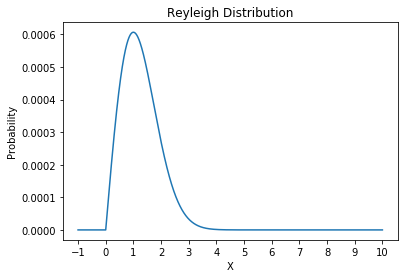

In [9]:
fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 10)

x = np.arange(-1,10,.001)
pdf = stats.rayleigh.pdf(x)*0.001 #include dx term
print(np.sum(pdf))
fig = plt.plot(x, pdf, label='rayleigh pdf')
plt.title("Reyleigh Distribution")
plt.xlabel("X")
plt.ylabel("Probability")
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.show()

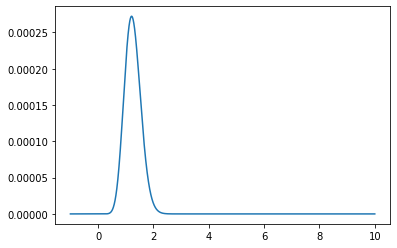

In [10]:
n = 5
sumpdf = pdf
for i in range(n-1):
    sumpdf = np.convolve(sumpdf, pdf)

x = np.linspace(-1,10, sumpdf.size)
fig = plt.plot(x, sumpdf, label="Summed Reyleigh Distribution")

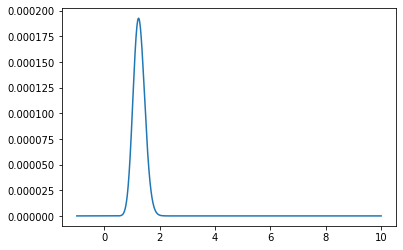

In [11]:
n = 10
sumpdf = pdf
for i in range(n-1):
    sumpdf = np.convolve(sumpdf, pdf)

x = np.linspace(-1,10, sumpdf.size)
fig = plt.plot(x, sumpdf, label="Summed Reyleigh Distribution")

The three graphs above are the Reyleigh distribution, 5 times averaged Reyleigh distribution, and 10 times averaged Reyleigh distribution respectively. The original distribution had twice the normal standard deviation, but even so it quickly converges toward a much narrower distribution; the question remains whether or not it is Gaussian, so we look at a Log plot.

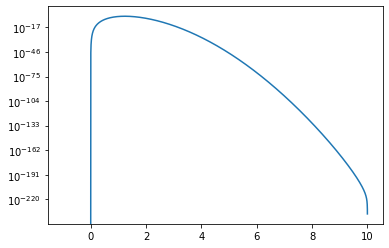

In [12]:
n = 10
sumpdf = pdf
for i in range(n-1):
    sumpdf = np.convolve(sumpdf, pdf)

x = np.linspace(-1,10, sumpdf.size)
fig = plt.plot(x, sumpdf, label="Summed Reyleigh Distribution")
plt.yscale('log')
plt.show()

Even after a large number of iterations, looking at the log graph of the distribution it doesn't appear to be approaching a gaussian distribution at all. For a greater number of iterations I would require a more capable computer.

## Problem 3

### Version 1

An alert from LIGO is seen along with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. Because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in. Based on the other pixels in the image, the standard deviation of the background Gaussian distribution representing the brightness in that pixel is $X = 1.3$. We see a signal of strength $Y = 6.34$.

In [13]:
prob = 1-stats.norm.cdf(6.34, scale = 1.3)
sigma = stats.norm.ppf(1-prob)
print(prob)
print(f"The significance of discovery : {sigma:.5f}σ")

5.387671550005635e-07
The significance of discovery : 4.87692σ


So just short of being able to claim a discovery with certainty $4.87692\sigma$.

### Version 2

With no detection from SWIFT, we have to determine the background distibution for the brightness of the 10k pixels. The question we are looking to answer is "What is probability for every floating-integer brightness for any given pixel?" After answering that, the next question is, "What is the probability of getting a signal of strength $Y=6.34$ in the background of 10k pixels?"

We make a probability density function for the brightness of all the pixels in the 10k pixel image (Gaussian distributed with scale $X = 1.3$ from last problem).

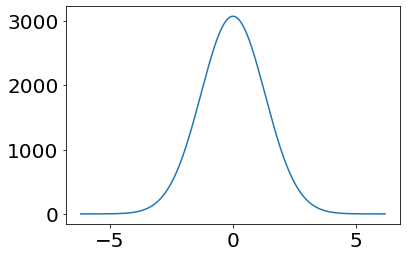

In [14]:
x = np.linspace(stats.norm.ppf(0.000001, loc=0, scale=1.3),
                stats.norm.ppf(0.999999, loc=0, scale=1.3),
                10000)
pixels = stats.norm.pdf(x, loc=0, scale=1.3)*10000
plt.tick_params(labelsize = 20)
fig = plt.plot(x, pixels, label='10k Pixels Brightness PDF')


Note that it is continuous (not recording discrete photons but a floating point brightness. If we find our brightest candidate with strength $Y=6.34$ and find the significance,

In [15]:
prob = (1-stats.norm.cdf(6.34, loc=0, scale=1.3))*10000
sig = stats.norm.ppf(1-prob)
print(f"The significance of discovery : {sig:.5f}σ")

The significance of discovery : 2.54990σ


$2.55\sigma$, which is much less significant than in version 1. The probability of having a source of strength $Y=1.3$ in an image of 10k pixels is much greater than the probability of having that source in one known pixel.

## Problem 4

Lets find out how strong a signal would need to be to confirm discovery (5 sigma) in both versions 1 and 2, using the same background distribution.

#### Version 1

In [16]:
fivesig = 1-stats.norm.cdf(5)
signal = stats.norm.ppf(1-fivesig, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}")

Signal strength required for 5σ : 6.500


#### Version 2

In [17]:
fivesig = 1-stats.norm.cdf(5)
signal = stats.norm.ppf(1-fivesig/10000, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}")
fac = signal/6.5
print(f"Brightness factor compared to 6.5 : {fac:.3f}")

Signal strength required for 5σ : 8.516
Brightness factor compared to 6.5 : 1.310


The brightness for a $5\sigma$ detection event with a trials factor of 10k must be 1.31 times brighter (8.516 as opposed to 6.5); the reason it seems to be such a small factor is that the probability decays very quickly as it gets brighter (Look at the quick decline of the tails of a Gaussian). So if there really was a signal to be found, and it was only slightly brighter, the probability of getting the signal from the background is magnitudes lower.

If we were to increase the magnitude of the trials factor from 10k to 100M,

In [18]:
fivesig = 1-stats.norm.cdf(5)
signal = stats.norm.ppf(1-fivesig/100000000, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}")
fac = signal/6.5
print(f"Brightness factor compared to 6.5 : {fac:.3f}")

Signal strength required for 5σ : 10.151
Brightness factor compared to 6.5 : 1.562


When we increase the size of the trials factor by another ten thousand times, it increases the brightness factor by a relatively small amount for the same reason as stated above.

##### Extra Credit
Suppose the background distribution was an exponential distribution, again with scale factor $X = 1.3$

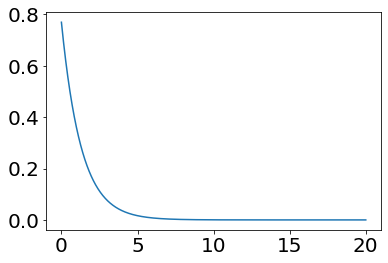

In [19]:
x = np.linspace(0,20,1000)
pdf = stats.expon.pdf(x, loc=0, scale=1.3)
fig = plt.plot(x, pdf)
plt.tick_params(labelsize = 20)
plt.show()

In [20]:
fivesig = 1-stats.norm.cdf(5)
basesignal = stats.expon.ppf(1-fivesig, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}\nwith trials factor of 1\n")

signal = stats.expon.ppf(1-fivesig/10000, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}\nwith trials factor of 10k")
factor = signal/basesignal
print(f"Signal factor : {factor:.3f}\n")

signal = stats.expon.ppf(1-fivesig/100000000, scale=1.3)
print(f"Signal strength required for 5σ : {signal:.3f}\nwith trials factor of 100M")
factor = signal/basesignal
print(f"Signal factor : {factor:.3f}")

Signal strength required for 5σ : 10.151
with trials factor of 1

Signal strength required for 5σ : 31.558
with trials factor of 10k
Signal factor : 1.611

Signal strength required for 5σ : 43.522
with trials factor of 100M
Signal factor : 2.222


Based on the above examples, the exponential distribution is significantly more sensitive to trials factors than the Gaussian distribution, likely because the tail decays more slowly. However, it clearly falls off in sensitivity to trials factors just like the Gaussian as the difference between 10k and 100M trials factor is smaller than the difference between 1 and 10k.